ENGINEERING GRADUATE SALARY PRETCTION: REGRESSION VS CLASSIFICATION

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


**SALARY** **PREDICTION**

**Data preprocessing** is a crucial step in data analysis and machine learning. The steps included are:

1. **Cleaning and Handling Missing Data**:
   - Identify and handle missing values (e.g., impute
with mean, median, or mode).
   - Remove duplicate records.
   - Address outliers that might skew your analysis.

2. **Feature Transformation**:
   - Standardize or normalize features to bring them to a common scale.
   - Encode categorical variables (e.g., one-hot encoding) for machine learning algorithms.
   - Create new features (e.g., combining existing ones).

3. **Data Reduction**:
   - Reduce dimensionality (e.g., using PCA or feature selection techniques).
   - Remove irrelevant or redundant features.

4. **Data Formatting**:
   - Ensure consistent data types (e.g., converting dates to a standard format).
   - Handle text data (cleaning, tokenization, stemming, etc.).



In [3]:
# import necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from pandas import DataFrame, read_csv, get_dummies
from matplotlib.pyplot import figure, subplot2grid
from seaborn import set_theme,scatterplot,displot,barplot,countplot,heatmap
from sklearn.linear_model import Ridge
from numpy import where,abs,median,nan,sqrt

In [4]:
set_theme(context="notebook",style='darkgrid', palette='inferno')

In [6]:
# Load dataset
df = pd.read_csv('/content/drive/MyDrive/ICTAK/Engineering_graduate_salary.csv')

# Display the first few rows
print(df.head())

       ID Gender         DOB  10percentage                       10board  \
0  604399      f  1990-10-22         87.80                          cbse   
1  988334      m  1990-05-15         57.00                          cbse   
2  301647      m  1989-08-21         77.33  maharashtra state board,pune   
3  582313      m  1991-05-04         84.30                          cbse   
4  339001      f  1990-10-30         82.00                          cbse   

   12graduation  12percentage                    12board  CollegeID  \
0          2009         84.00                       cbse       6920   
1          2010         64.50                       cbse       6624   
2          2007         85.17  amravati divisional board       9084   
3          2009         86.00                       cbse       8195   
4          2008         75.00                       cbse       4889   

   CollegeTier  ... MechanicalEngg ElectricalEngg  TelecomEngg  CivilEngg  \
0            1  ...             -1     

In [ ]:
# df.info()

In [9]:
# Check for missing values
missing_values = df.isnull().sum()
print(missing_values)


ID                       0
Gender                   0
DOB                      0
10percentage             0
10board                  0
12graduation             0
12percentage             0
12board                  0
CollegeID                0
CollegeTier              0
Degree                   0
Specialization           0
collegeGPA               0
CollegeCityID            0
CollegeCityTier          0
CollegeState             0
GraduationYear           0
English                  0
Logical                  0
Quant                    0
Domain                   0
ComputerProgramming      0
ElectronicsAndSemicon    0
ComputerScience          0
MechanicalEngg           0
ElectricalEngg           0
TelecomEngg              0
CivilEngg                0
conscientiousness        0
agreeableness            0
extraversion             0
nueroticism              0
openess_to_experience    0
Salary                   0
dtype: int64


In [10]:
# # Assuming 'df' is your DataFrame
# specific_value = 'cbse'
# filtered_df = df[df['10board'] != specific_value]
# print(filtered_df)


In [11]:
# # Assuming 'df' is your DataFrame
# specific_value = 50
# filtered_df = df[df['12percentage'] <= specific_value]
# print(filtered_df)

In [12]:
# # Assuming 'df' is your DataFrame
# specific_value = 'cbse'
# filtered_df = df[df['10board'] != specific_value]
# print(filtered_df)

In [13]:
df.replace(to_replace=-1, value=0,inplace=True)

In [14]:
df.drop(columns=["ID", "DOB", "CollegeCityID"], inplace=True)

In [15]:
# df["CollegeID"].nunique()

In [16]:
df["Gender"] = df["Gender"].replace({'m': 0, 'f': 1})

In [17]:
df = df[df["GraduationYear"]> 2000]
df = df[df["collegeGPA"] > 40]

In [18]:
y = df["Salary"]
#print (y)
print(max(y))
print(min(y))
print(median(y))

4000000
35000
300000.0


In [19]:
df.size

92628

In [20]:
df = df[df["Salary"] >100000]

In [21]:
df.size

87327

In [22]:
y = df["Salary"]
#print (y)
print(max(y))
print(min(y))
print(median(y))

4000000
105000
300000.0


In [23]:
df["Salary"] = pd.cut(df["Salary"], bins=20, labels=False)

In [24]:
# df = df[df["Degree"] != "MCA"]

In [25]:
df.size

87327

In [26]:
# print(df)

In [ ]:
from sklearn.preprocessing import LabelEncoder

categorical_columns = ['10board', '12board', 'Degree', 'Specialization', 'CollegeState']
label_encoder = LabelEncoder()

for col in categorical_columns:
    df[col + '_encoded'] = label_encoder.fit_transform(df[col])


In [28]:
df.drop(columns=['10board', '12board', 'Degree', 'Specialization', 'CollegeState'], inplace=True)


In [29]:
 print(df.head())

   Gender  10percentage  12graduation  12percentage  CollegeID  CollegeTier  \
0       1         87.80          2009         84.00       6920            1   
1       0         57.00          2010         64.50       6624            2   
2       0         77.33          2007         85.17       9084            2   
3       0         84.30          2009         86.00       8195            1   
4       1         82.00          2008         75.00       4889            2   

   collegeGPA  CollegeCityTier  GraduationYear  English  ...  MechanicalEngg  \
0       73.82                1            2013      650  ...               0   
1       65.00                0            2014      440  ...               0   
2       61.94                0            2011      485  ...               0   
3       80.40                1            2013      675  ...               0   
4       64.30                1            2012      575  ...               0   

   ElectricalEngg  TelecomEngg  CivilEngg  c

In [31]:
df.drop(columns=[ "CollegeCityTier"], inplace=True)

In [32]:
# print(df)

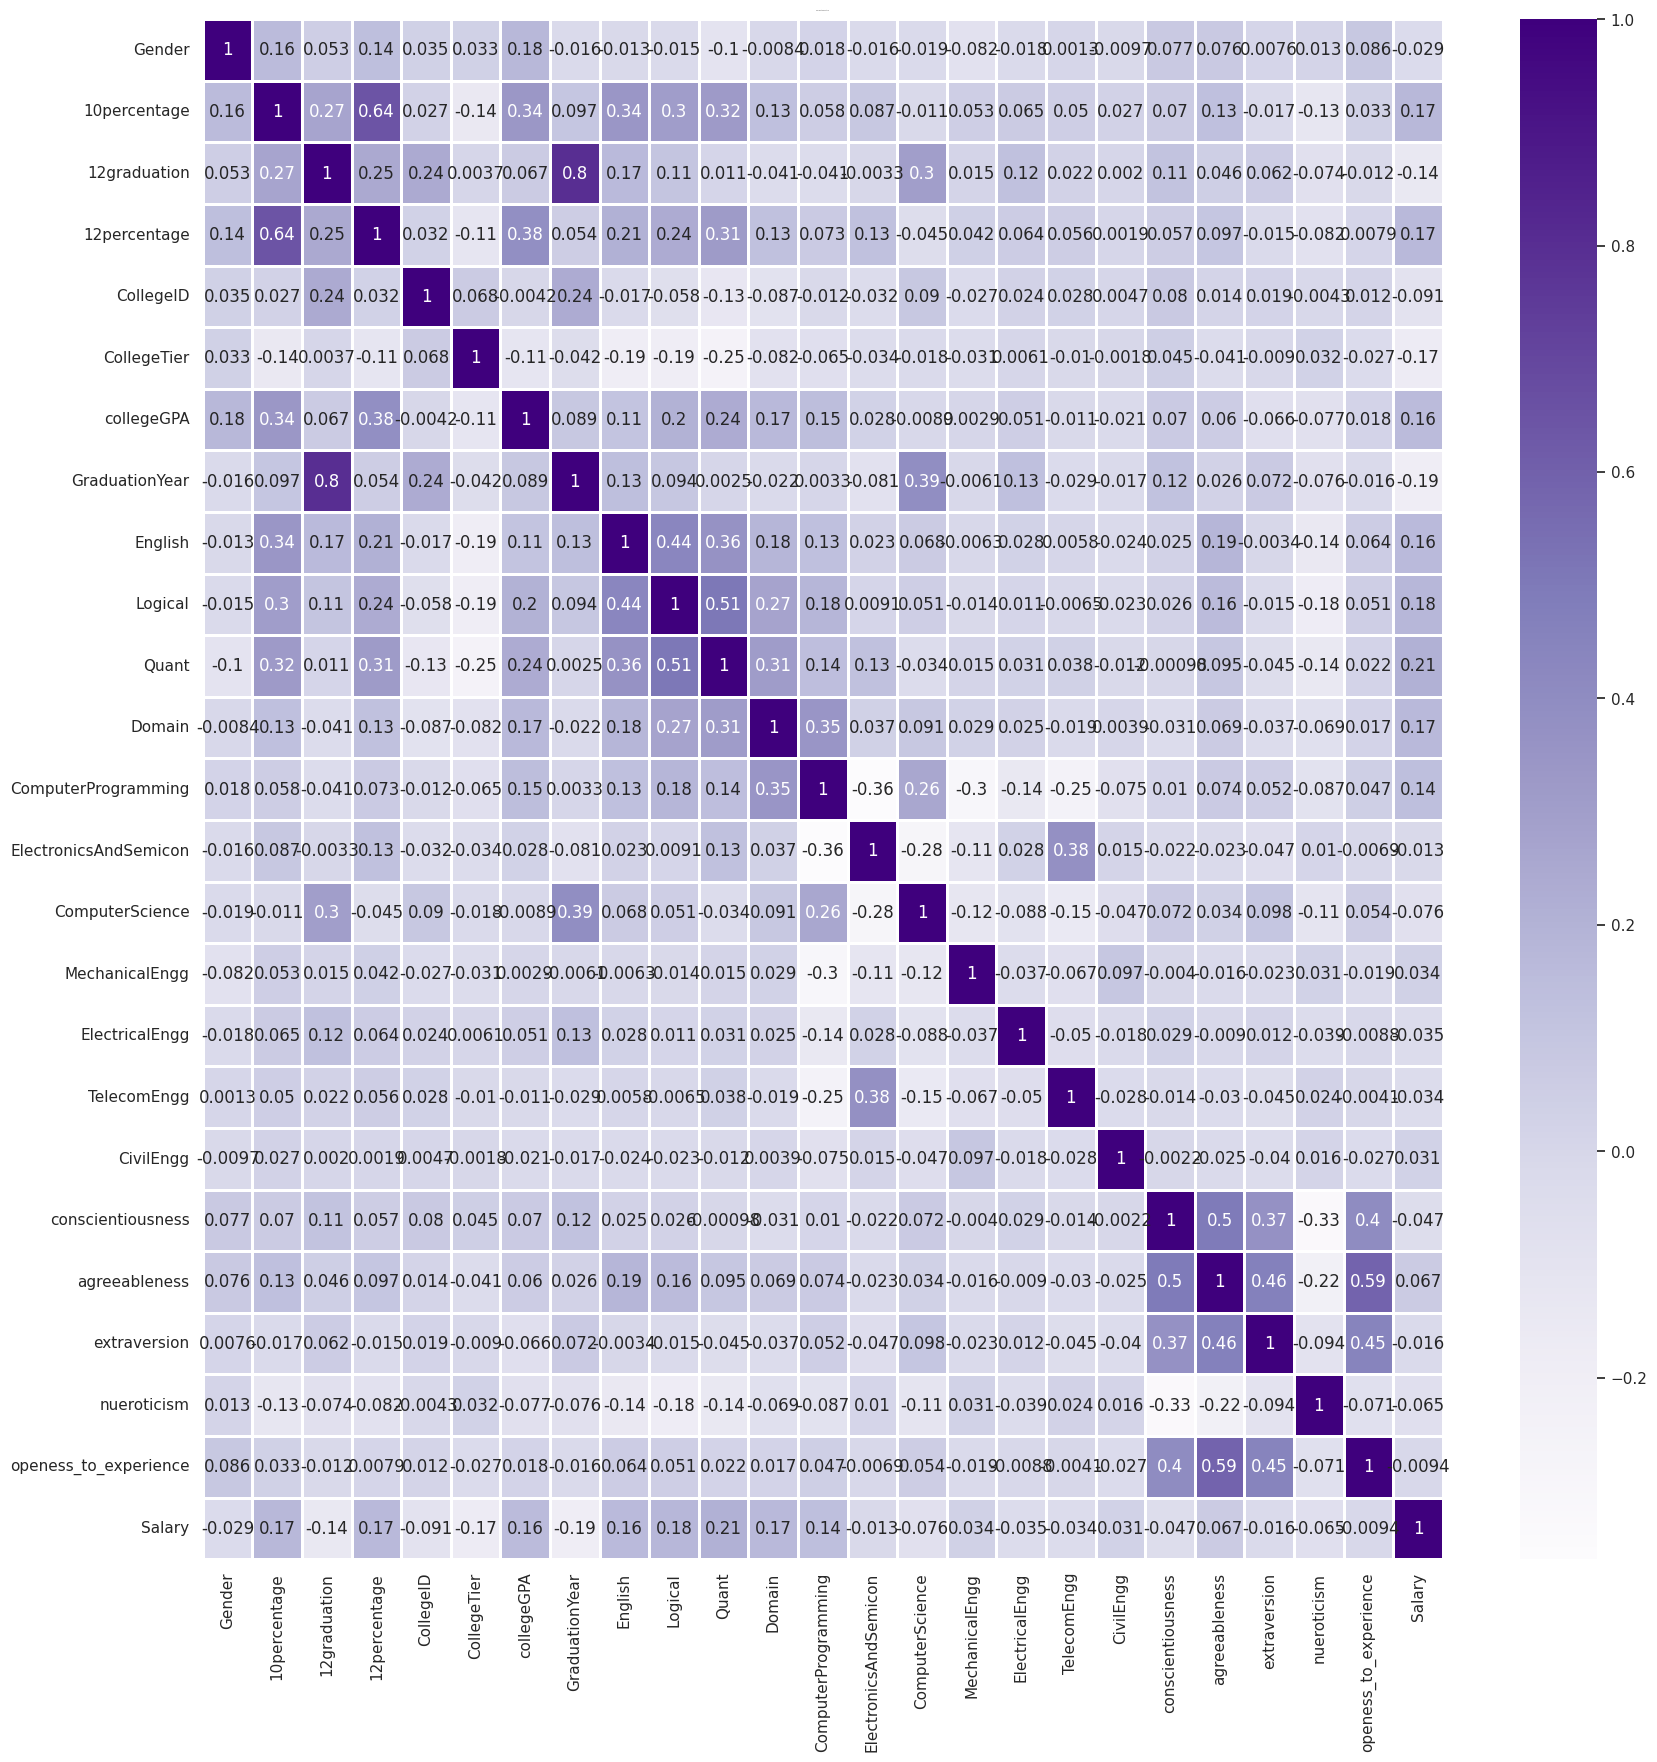

<Figure size 640x480 with 0 Axes>

In [33]:
# Assuming 'df' is your DataFrame
correlation_matrix = df.corr()

# Plot the heatmap
plt.figure(figsize=(20,20))
sns.heatmap(correlation_matrix, annot=True, cmap='Purples', linewidths=1)
plt.title("Correlation Matrix", fontsize=1)
plt.show()
plt.savefig("hm.pdf")


In [34]:
# Save to PDF
# plt.savefig("heatmap.pdf")


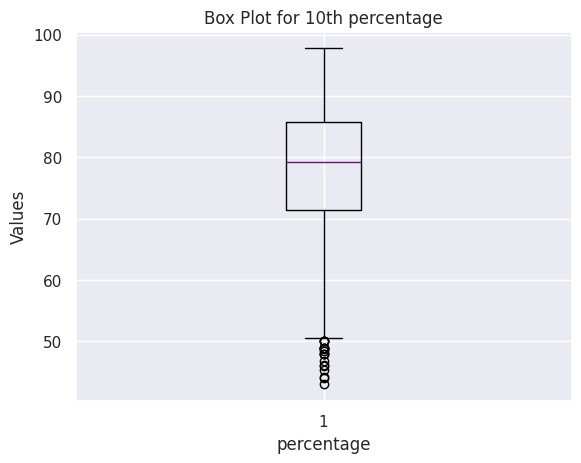

In [37]:
import pandas as pd
import matplotlib.pyplot as plt
# Create a box plot for a specific column (e.g., 'age')
plt.boxplot(df['10percentage'])
plt.xlabel('percentage')

plt.ylabel('Values')
plt.title('Box Plot for 10th percentage')
plt.show()


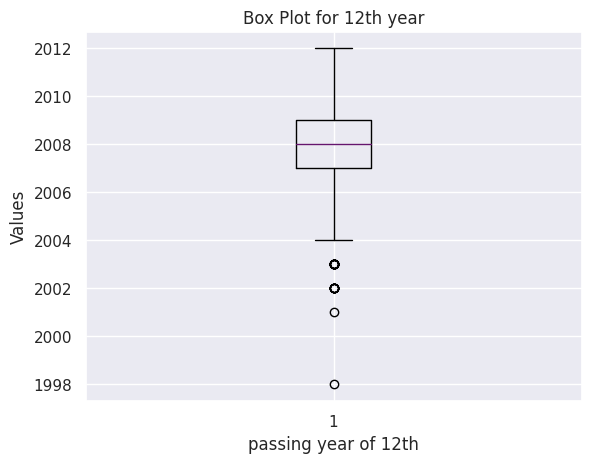

In [38]:
import pandas as pd
import matplotlib.pyplot as plt
# Create a box plot for a specific column (e.g., 'age')
plt.boxplot(df['12graduation'])
plt.xlabel('passing year of 12th')
plt.ylabel('Values')
plt.title('Box Plot for 12th year')
plt.show()

# import pandas as pd
# import matplotlib.pyplot as plt
# # Create a box plot for a specific column (e.g., 'age')
# #plt.title('Box Plot for Age')
# #plt.show()

# # Create a box plot for a specific column (e.g., 'age')
# plt.boxplot(df['collegeGPA'])
# plt.xlabel('college GPA')
# plt.ylabel('Values')
# plt.title('Box Plot for college GPA')
# plt.show()

# # Create a box plot for a specific column (e.g., 'age')
# plt.boxplot(df['GraduationYear'])
# plt.xlabel('GraduationYear')
# plt.ylabel('Values')
# plt.title('Box Plot for GraduationYear')
# plt.show()

# # Create a box plot for a specific column (e.g., 'age')
# plt.boxplot(df['English'])
# plt.xlabel('English mark')
# plt.ylabel('Values')
# plt.title('Box Plot for English mark')
# plt.show()

# # Create a box plot for a specific column (e.g., 'age')
# plt.boxplot(df['Logical'])
# plt.xlabel('Age')
# plt.ylabel('Values')
# plt.title('Box Plot for logical mark')
# plt.show()

# # Create a box plot for a specific column (e.g., 'age')
# plt.boxplot(df['Quant'])
# plt.xlabel('Quatitative analysis')
# plt.ylabel('Values')
# plt.title('Box Plot for Quatitative analysis')
# plt.show()

# # Create a box plot for a specific column (e.g., 'age')
# plt.boxplot(df['Domain'])
# plt.xlabel('main domain mark')
# plt.ylabel('Values')
# plt.title('Box Plot for main domain mark')
# plt.show()



In [39]:
df.describe()

,Gender,10percentage,12graduation,12percentage,CollegeID,CollegeTier,collegeGPA,GraduationYear,English,Logical,...,MechanicalEngg,ElectricalEngg,TelecomEngg,CivilEngg,conscientiousness,agreeableness,extraversion,nueroticism,openess_to_experience,Salary
count,2817.000000,2817.000000,2817.000000,2817.00000,2817.000000,2817.000000,2817.000000,2817.000000,2817.000000,2817.000000,...,2817.000000,2817.000000,2817.000000,2817.000000,2817.000000,2817.000000,2817.000000,2817.000000,2817.000000,2817.000000
mean,0.236422,77.908988,2008.078807,74.55754,5149.796592,1.920838,71.773841,2012.597799,503.895989,502.536386,...,23.561590,17.282925,32.083067,2.850195,-0.038064,0.140047,0.006290,-0.157894,-0.130857,0.730919
std,0.424960,9.943998,1.628112,11.07392,4770.042912,0.270040,7.312949,1.310375,105.548363,86.817493,...,97.030571,86.388553,103.434543,32.080625,1.021978,0.948006,0.959668,1.011953,0.998695,1.073644
min,0.000000,43.000000,1998.000000,40.00000,2.000000,1.000000,49.070000,2007.000000,180.000000,195.000000,...,0.000000,0.000000,0.000000,0.000000,-3.893300,-5.781600,-4.600900,-2.643000,-6.992500,0.000000
25%,0.000000,71.500000,2007.000000,66.00000,501.000000,2.000000,66.700000,2012.000000,430.000000,445.000000,...,0.000000,0.000000,0.000000,0.000000,-0.649100,-0.287100,-0.604800,-0.868200,-0.669200,0.000000
50%,0.000000,79.200000,2008.000000,74.40000,3918.000000,2.000000,71.920000,2013.000000,500.000000,505.000000,...,0.000000,0.000000,0.000000,0.000000,0.046400,0.212400,0.091400,-0.234400,-0.050600,1.000000
75%,0.000000,85.800000,2009.000000,82.80000,8818.000000,2.000000,76.360000,2014.000000,575.000000,565.000000,...,0.000000,0.000000,0.000000,0.000000,0.702700,0.812800,0.672000,0.526200,0.502400,1.000000
max,1.000000,97.760000,2012.000000,98.70000,18409.000000,2.000000,99.930000,2017.000000,875.000000,795.000000,...,623.000000,660.000000,548.000000,500.000000,1.995300,1.904800,2.161700,3.352500,1.630200,19.000000


In [ ]:
# import seaborn as sns
# import matplotlib.pyplot as plt

# # Assuming 'df' is your DataFrame
# # ax = sns.countplot(x='Degree', data=df)
# plt.show()
# # Assuming 'df' is your DataFrame
# # ax = sns.countplot(x='12board', data=df)
# plt.show()

# plot = displot(df["10percentage"], kde=True)

# plot = displot(df["12percentage"], kde=True)

# plot = displot(df["collegeGPA"], kde=True)

# plot = displot(df["English"], kde=True)

# plot = displot(df["conscientiousness"], kde=True)



In [ ]:
# figure(figsize=(8,4))
# plot = barplot(x=df["Degree_encoded"],y=df["Salary"])
# plot.set_xticklabels(plot.get_xticklabels(),rotation="vertical")
# plot.set_title("Bar Plot of Degree with Salary", fontsize=14)

In [ ]:
# figure(figsize=(8,4))
# plot = barplot(x=df["Gender"],y=df["Salary"])
# plot.set_xticklabels(plot.get_xticklabels(),rotation="horizontal")
# plot.set_title("Bar Plot of Degree with Salary", fontsize=14)